# Shuffling Method

Inspired by [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers) by Jake VanderPlas

Let's say you have 2 sets of test scores:  
    
    54, 51, 58, 44, 55, 52, 42, 47, 58, 46  
    
and  
    
    54, 73, 53, 70, 73, 68, 52, 65, 65  
    
The mean of the first set of test scores is 73.5 and the mean of the second set of test scores is 66.9.  
The difference between the 2 means is 6.58.

Is this difference statistically significant?

In [1]:
%matplotlib inline
import numpy as np                     # library to allow us to use vectorized datastructures
import matplotlib.pyplot as plt        # plotting library

test1 = [
    54, 51, 58, 44, 55, 52, 42, 47, 58, 46
]

test2 = [
    54, 73, 53, 70, 73, 68, 52, 65, 65
]

test_scores1 = np.array(test1)
test_scores2 = np.array(test2)

### Test score set 1 mean:

In [2]:
test_scores1.mean()

50.700000000000003

### Test score set 2 mean:

In [3]:
test_scores2.mean()

63.666666666666664

In [4]:
diff = abs(test_scores1.mean() - test_scores2.mean())
diff

12.966666666666661

### Is the difference in the means statistically significant?

## Let's apply the shuffling method

### Create draw space from which we will sample data from which consists of both test scores

In [5]:
combined = np.concatenate((test_scores1, test_scores2))

### Let's double-check that the list has what we want

In [6]:
combined

array([54, 51, 58, 44, 55, 52, 42, 47, 58, 46, 54, 73, 53, 70, 73, 68, 52,
       65, 65])

### Now we will perform the experiement 10,000 times, picking random numbers from the draw space with replacement.  numpy's random.choice() function is really handy!

In [7]:
diff_means = np.array([])
for i in range(10000):
    diff_means = np.append(diff_means, np.random.choice(combined, size=len(test_scores1), replace=True).mean()
                           - np.random.choice(combined, size=len(test_scores2), replace=True).mean()
                          )

### Plot the mean differences in a histogram along with vertical red line where the stated difference lies

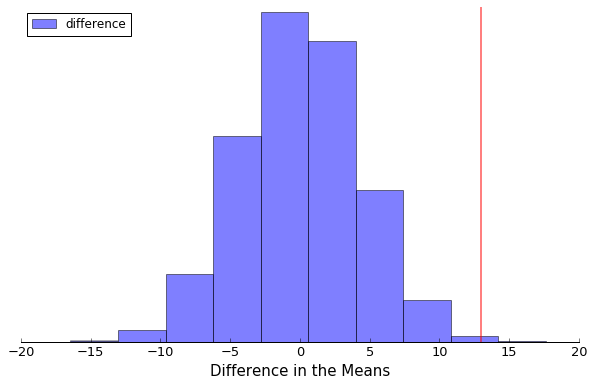

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(diff_means, alpha=.5, label='difference')
plt.legend(loc='best')
plt.xlabel('Difference in the Means', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=13)
ax.get_yaxis().set_ticks([])
plt.axvline(diff, linewidth=2, alpha=0.5, color='red')
plt.show()

In [9]:
# get number of observations greater than the stated difference
gt_diff = diff_means[diff_means >= diff]

# calculate portion of differences that are greater than or equal to the stated difference
p = len(gt_diff) / 10000

# print results
print('Out of 10,000 samples, the probability that the difference in the means is >= ' + 
      "{0:.2f}".format(diff) + ' is ' + str(p))

Out of 10,000 samples, the probability that the difference in the means is >= 12.97 is 0.0014


Since the probability that the difference in the means is greater than or equal to 12.97 is less than 0.05, the difference is significant.  In other words, we have about 1.4% probability that the difference in the means is equal to or greater than 12.97.

# Calculating 90% Confidence Interval for the Difference In the Means

Same shuffling except, instead of taking samples from the "combined" list, we take samples from the two individual test score sets (test_scores1 and test_scores2)

In [22]:
diff_means_conf = np.array([])
for i in range(10000):
    diff_means_conf = np.append(diff_means_conf, np.random.choice(combined, size=len(test_scores1), replace=True).mean()
                           - np.random.choice(combined, size=len(test_scores2), replace=True).mean()
                          )

In [23]:
# sort the difference values in the means
diff_means_conf.sort()

# set confidence interval and tail values
conf_interval = 0.9
tails = (1 - conf_interval) / 2

# calculate the value that is at the lowest 5% mark out of 10000 = 500
lower_bound = int(np.ceil(10000 * tails))

# calclate the value that is at the highest 5% mark out of 10000 = 9500
upper_bound = int(np.floor(10000 * (1 - tails)))

In [24]:
diff_means_conf[lower_bound]

-7.1555555555555586

In [25]:
diff_means_conf[upper_bound]

7.1000000000000014

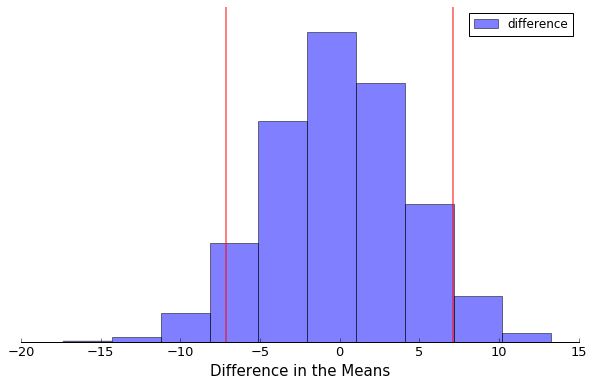

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(diff_means_conf, alpha=.5, label='difference')
plt.legend(loc='best')
plt.xlabel('Difference in the Means', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=13)
ax.get_yaxis().set_ticks([])
plt.axvline(diff_means_conf[lower_bound], linewidth=2, alpha=0.5, color='red')
plt.axvline(diff_means_conf[upper_bound], linewidth=2, alpha=0.5, color='red')
plt.show()

In [27]:
print('With 90% confidence, the true difference between the means will fall between ' + 
      "{0:.2f}".format(diff_means[lower_bound]) + ' and ' + "{0:.2f}".format(diff_means[upper_bound]))

With 90% confidence, the true difference between the means will fall between -18.07 and -7.66
